In [1]:
import os
import pathlib
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
import os
import numpy as np
from scipy.io import wavfile

# Set the path of the directory containing the 24-bit WAV files
input_dir = 'C://Users//jasmi//Dissertation Project//Data//Archive//Pneumonia'

# Set the path of the directory to save the converted 16-bit WAV files
output_dir = 'C://Users//jasmi//Dissertation Project//New Data//Pneumonia'

# Iterate over all the WAV files in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.wav'):
        # Construct the input file path
        input_file_path = os.path.join(input_dir, file_name)

        # Load the 24-bit WAV file
        sample_rate, audio_data = wavfile.read(input_file_path)

        # Convert the audio data to a float array and normalize it to the range [-1, 1]
        audio_float = audio_data.astype('float32') / 2**(8*3-1)

        # Convert the audio data to a 16-bit integer array by scaling it to the range [-32768, 32767]
        audio_int16 = (audio_float * 32767).astype('int16')

        # Construct the output file path
        output_file_path = os.path.join(output_dir, file_name)

        # Save the 16-bit WAV file
        wavfile.write(output_file_path, sample_rate, audio_int16)

In [2]:
DATASET_PATH = 'data/Archive_2'

data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
    tf.keras.utils.get_file(
        'archive.zip',
        origin="https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database/download?datasetVersionNumber=2",
        extract=True,
        cache_dir='.', cache_subdir='data3')

In [3]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]
print('Commands:', commands)

Commands: ['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'LRTI'
 'Pneumonia' 'URTI']


In [5]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=32,
    # Used for validation, between 0 and 1. In this case, 20%
    validation_split=0.2,
    seed=0,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 1840 files belonging to 8 classes.
Using 1472 files for training.
Using 368 files for validation.

label names: ['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'LRTI'
 'Pneumonia' 'URTI']


In [6]:
train_ds.element_spec

(TensorSpec(shape=(None, None, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [7]:
def squeeze(audio, labels):
    audio = tf.squeeze(audio, axis=-1)
    return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

In [8]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [9]:
for example_audio, example_labels in train_ds.take(1):  
    print(example_audio.shape)
    print(example_labels.shape)

(32, 882001)
(32,)


In [10]:
label_names[[1,1,3,0]]

array(['Bronchiectasis', 'Bronchiectasis', 'COPD', 'Asthma'], dtype='<U14')

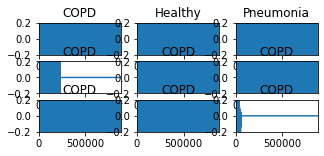

In [17]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(5, 2))

for i in range(n):
    if i>=n:
        break
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(example_audio[i].numpy())
    ax.set_xlim([0, example_audio[i].shape[0]])
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label_names[example_labels[i]]
    ax.set_title(label)
    ax.set_ylim([-0.2, 0.2])

plt.show()

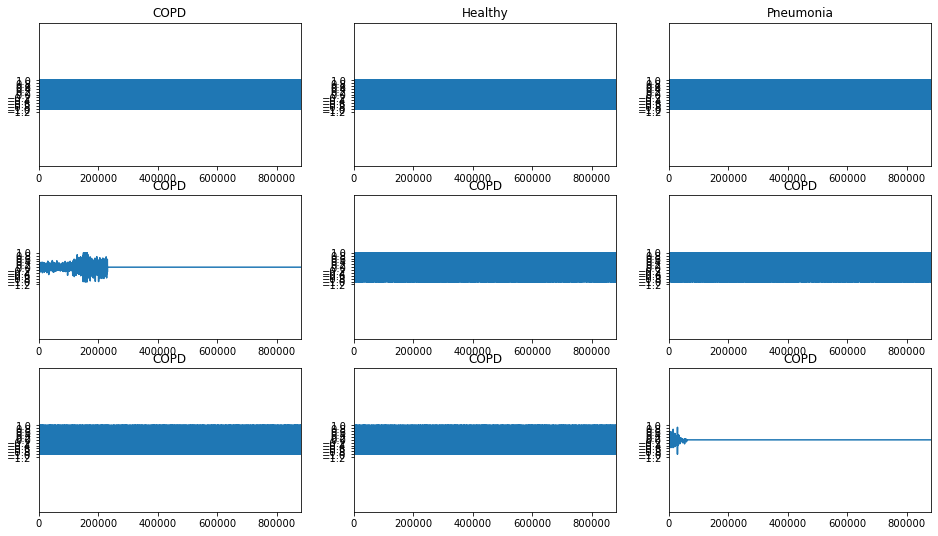

In [14]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    if i >= len(example_audio):
        break
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(example_audio[i].numpy())
    ax.set_xlim([0, example_audio[i].shape[0]])
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label_names[example_labels[i]]
    ax.set_title(label)
    ax.set_ylim([-5, 5])

plt.show()